In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np

In [2]:
# define a function to plot accuracy and loss

def plot_accuracy_loss(training_results):
    
    plt.subplot(2,1,1)
    plt.plot(training_results['training_loss'], 'r')
    plt.ylabel('loss')
    plt.title('training loss iterartions')
    plt.subplot(2,1,2)
    plt.plot(training_results['validation_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.show()

In [3]:
# define a function to plot model parameters

def print_model_parameters(model):
    count = 0
    for ele in model.state_dict():
        count += 1
        if count % 2 != 0:
            print('The following are the parameters for the layer ', count // 2 + 1)
        if ele.find('bias') != -1:
            print('The size of the bias:', model.state_dict()[ele].size())
        else:
            print('The size of the weights:', model.state_dict()[ele].size())

In [4]:
# define a function to display data

def show_data(data_sample):
    plt.imshow(data_sample.numpy().reshape(28,28), cmap = 'gray')
    plt.show()

In [5]:
# define a Neural network class

class Net(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        
    # prediction
    def forward(self,x):
        x = torch.sigmoid(self.linear1(x))
        x = self.linear2(x)
        return x

In [6]:
# define a training function to train the model:

def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    useful_stuff = {'training_loss': [], 'validation_accuracy': []}
    for epoch in range(epochs):
        for i, (x,y) in enumerate (train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28*28))
            loss = criterion(z,y)
            loss.backward()
            optimizer.step()
            
            # loss for every iterations
            useful_stuff['training_loss'].append(loss.data.item())
            
        correct = 0
        for x,y in validation_loader:
            # validation
            z = model(x.view(-1, 28*28))
            _, labels = torch.max(z,1)
            correct += (labels == y).sum().item()
        accuracy = 100 * (correct/len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
    return useful_stuff

In [7]:
# create traing dataset

train_dataset = dsets.MNIST(root = './data', train = True, download = True, transform = transforms.ToTensor())

In [8]:
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [9]:
criterion = nn.CrossEntropyLoss()

In [10]:
from torch.utils.data import Dataset, DataLoader

In [11]:
train_loader = DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

In [12]:
# create a model wit 100 neurons

input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = Net(input_dim, hidden_dim, output_dim)

In [14]:
print_model_parameters(model)

The following are the parameters for the layer  1
The size of the weights: torch.Size([100, 784])
The size of the bias: torch.Size([100])
The following are the parameters for the layer  2
The size of the weights: torch.Size([10, 100])
The size of the bias: torch.Size([10])


In [15]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [16]:
train_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=30)

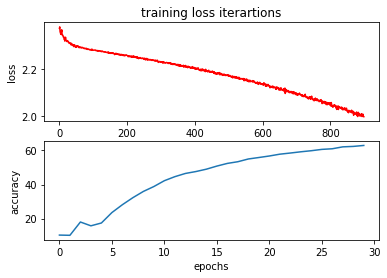

In [17]:
plot_accuracy_loss(train_results)

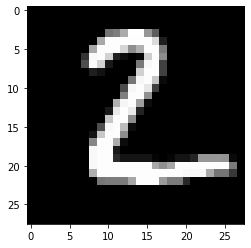

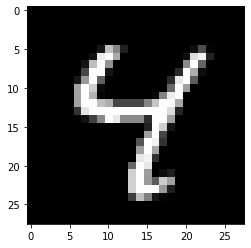

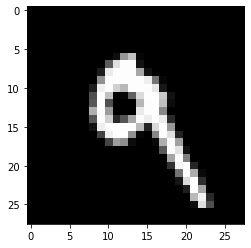

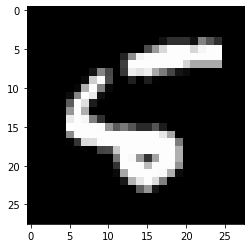

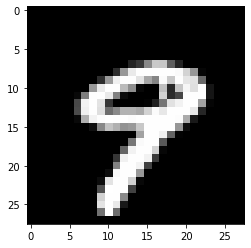

In [21]:
# plot the first five misclassified samples:

count = 0
for x,y in validation_dataset:
    z = model(x.reshape(-1, 28*28))
    _,yhat = torch.max(z,1)
    if yhat!= y:
        show_data(x)
        count += 1
    if count >= 5:
        break

In [25]:
# use nn.Sequential

input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

model = torch.nn.Sequential(
         torch.nn.Linear(input_dim, hidden_dim),
         torch.nn.Sigmoid(),
         torch.nn.Linear(hidden_dim, output_dim)
)

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=10)

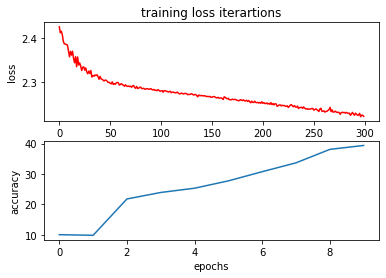

In [26]:
plot_accuracy_loss(training_results)